## ECE 239 Final Project

In this project we explore various deep learning algorithms on the EEG dataset. 


In [10]:
# Imports and setup

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM
from keras.layers import GRU

from utils.load_data import *
from models.cnn import CNN
from models.rnn import RNN

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Loads data from the EEG dataset and removes all EOG data

person_train_valid, X_train_valid, y_train_valid, person_test, X_test, y_test = load_EEG_data()

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


## Split into train and validation datasets

In [12]:
X_train, y_train, X_val, y_val = split_train_val(X_train_valid, y_train_valid, percent_validation=0.1)

print ('Training data shape: {}'.format(X_train.shape))
print ('Training target shape: {}'.format(y_train.shape))
print ('Validation data shape: {}'.format(X_val.shape))
print ('Validation target shape: {}'.format(y_val.shape))

Training data shape: (1904, 22, 1000)
Training target shape: (1904,)
Validation data shape: (211, 22, 1000)
Validation target shape: (211,)


## One hot encoding for all labels

In [13]:
print (y_val[33])
print (y_val.shape)
print (y_test.shape)

def convert_to_label(num):
    return np.array([1.0*(num==769),  1.0*(num==770), 1.0*(num==771), 1.0*(num==772)])

y_train_labels = np.array([convert_to_label(yi) for yi in y_train])
y_val_labels = np.array([convert_to_label(yi) for yi in y_val])
y_test_labels = np.array([convert_to_label(yi) for yi in y_test])

print (y_val_labels[33])
print (y_val_labels.shape)
print (y_test_labels.shape)


769
(211,)
(443,)
[1. 0. 0. 0.]
(211, 4)
(443, 4)


## Classifying data using a CNN

In [14]:
cnn = CNN(X_train, y_train_labels, X_val, y_val_labels, X_test, y_test_labels)
cnn.train(stride=2, optimizer='adam', epochs=5)
test_loss, test_accuracy = cnn.evaluate()
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Train on 1904 samples, validate on 211 samples
Epoch 1/5
1904/1904 [==============================] - 1s 461us/sample - loss: 1.3909 - acc: 0.2563 - val_loss: 1.3930 - val_acc: 0.2464
Epoch 2/5
1904/1904 [==============================] - 0s 259us/sample - loss: 1.3743 - acc: 0.2826 - val_loss: 1.3978 - val_acc: 0.2607
Epoch 3/5
1904/1904 [==============================] - 0s 251us/sample - loss: 1.3735 - acc: 0.2899 - val_loss: 1.3885 - val_acc: 0.2559
Epoch 4/5
1904/1904 [==============================] - 0s 218us/sample - loss: 1.3632 - acc: 0.2946 - val_loss: 1.4113 - val_acc: 0.2796
Epoch 5/5
443/443 [==============================] - 0s 125us/sample - loss: 1.3999 - acc: 0.2257
Test loss: 1.399915742551231
Test accuracy: 0.22573364


## Classifying data using an LSTM Architecture

Train on 1904 samples, validate on 211 samples
Epoch 1/5
1904/1904 [==============================] - 5s 3ms/step - loss: 0.6580 - acc: 0.6404 - val_loss: 0.6048 - val_acc: 0.7204
Epoch 2/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.4972 - acc: 0.7732 - val_loss: 0.5967 - val_acc: 0.7133
Epoch 3/5
1904/1904 [==============================] - 5s 2ms/step - loss: 0.4127 - acc: 0.8296 - val_loss: 0.5863 - val_acc: 0.7263
Epoch 4/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.3525 - acc: 0.8716 - val_loss: 0.5839 - val_acc: 0.7263
Epoch 5/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.3030 - acc: 0.9057 - val_loss: 0.5923 - val_acc: 0.7227
Test loss: 0.6018243767068833
Test accuracy: 0.7104966153409626


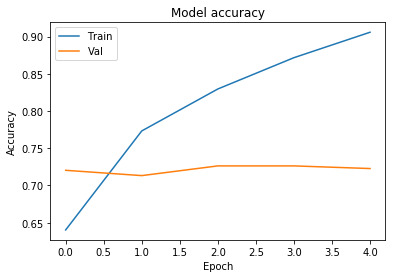

In [15]:
rnn = RNN(X_train, y_train_labels, X_val, y_val_labels, X_test, y_test_labels)
rnn.train(RNN_architecture=LSTM, activation="sigmoid", \
              optimizer='adam', epochs=5, batch_size=64, dropout=0.3)
test_loss, test_accuracy = rnn.evaluate()
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
rnn.plot()

## Classifying Data using a GRU Architecture

In [14]:
rnn = RNN(X_train, y_train_labels, X_val, y_val_labels, X_test, y_test_labels)
rnn.train(RNN_architecture=GRU, activation="sigmoid", \
              optimizer='adam', epochs=5, batch_size=64, dropout=0.1)
test_loss, test_accuracy = rnn.evaluate()
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Train on 1904 samples, validate on 211 samples
Epoch 1/5
1904/1904 [==============================] - 5s 2ms/step - loss: 0.6889 - acc: 0.6624 - val_loss: 0.6464 - val_acc: 0.6919
Epoch 2/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.4274 - acc: 0.8167 - val_loss: 0.6387 - val_acc: 0.7062
Epoch 3/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.3080 - acc: 0.8964 - val_loss: 0.6367 - val_acc: 0.7097
Epoch 4/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.2266 - acc: 0.9442 - val_loss: 0.6463 - val_acc: 0.7026
Epoch 5/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.1708 - acc: 0.9730 - val_loss: 0.6702 - val_acc: 0.7097
Test loss: 0.6635286232149628
Test accuracy: 0.6963882631964932
